<a href="https://colab.research.google.com/github/Hachiman999/Colab-imagen/blob/master/interpolacion_transformacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab.patches import cv2_imshow
from google.colab import drive 

drive.mount('/content/drive')

#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
#path
path_dir='/content/drive/My Drive/Colab Notebooks/Imagen'
os.chdir(path_dir)

#graficar imagenes 
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Interpolacion


In [0]:
def mostrar3(a,b,c, titulo1 ="original", titulo2="original",titulo3="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(223), plt.imshow(c), plt.title(titulo3)
   plt.xticks([])
   plt.yticks([]) 
   plt.show()

def mostrar3_gris(a,b,c, titulo1 ="original", titulo2="original",titulo3="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(titulo3)
   plt.xticks([])
   plt.yticks([])
   plt.show()
    
def mostrar2(a,b, titulo1 ="original", titulo2="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.show()

def mostrar2_gris(a,b, titulo1 ="original", titulo2="original"):
   plt.figure(figsize=(14,14))
   plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(titulo1)
   plt.xticks([])
   plt.yticks([])
   plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(titulo2)
   plt.xticks([])
   plt.yticks([])
   plt.show()
  
  
def redRGB (path):
  img = cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

/content/drive/My Drive/Colab Notebooks/Imagen


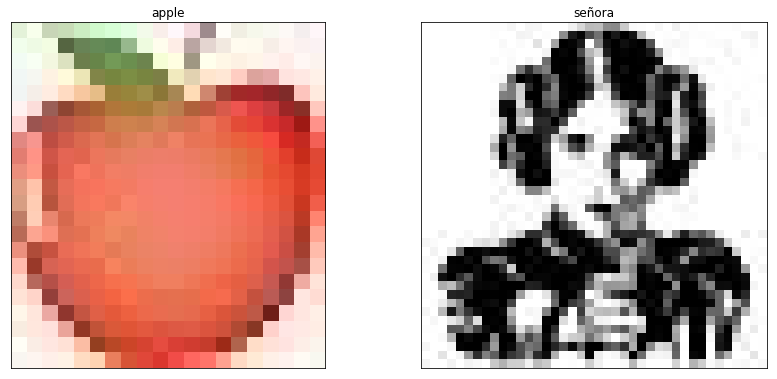

In [0]:
!pwd
imgA = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/apple20x22.jpg')
imgM = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/ico.jpg');
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_NEAREST)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_NEAREST)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

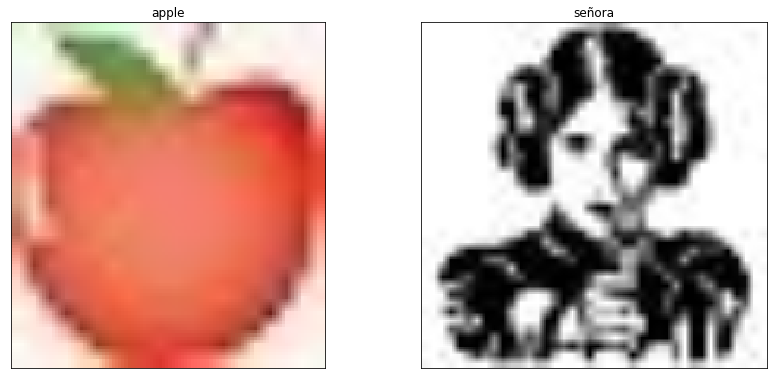

In [0]:
imgA = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/apple20x22.jpg')
imgM = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/ico.jpg')
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_LINEAR)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_LINEAR)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

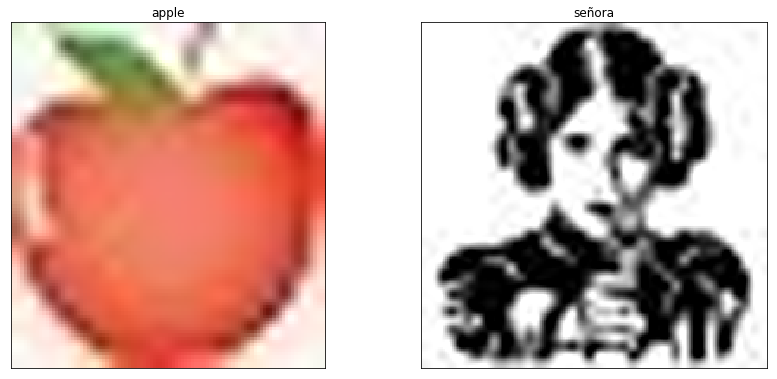

In [0]:
imgA = redRGB('apple20x22.jpg')
imgM = redRGB('ico.jpg')
ner_imgA = cv2.resize(imgA, None, fx =5 , fy =5 , interpolation = cv2.INTER_CUBIC)
ner_imgB = cv2.resize(imgM, None, fx =5 , fy =5 , interpolation = cv2.INTER_CUBIC)
mostrar2(ner_imgA, ner_imgB,'apple','señora')

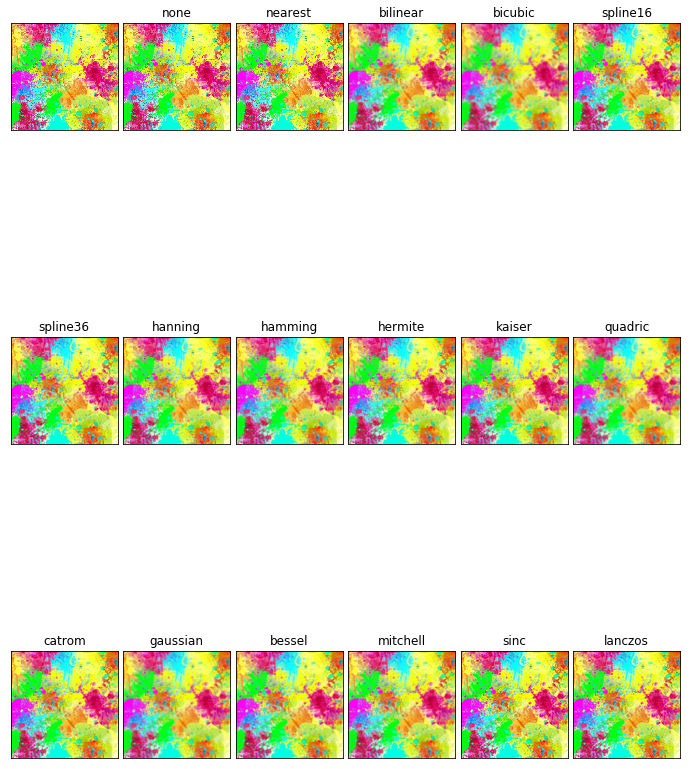

In [0]:
metodos = [None,  'none', 'nearest','bilinear', 'bicubic', 'spline16', 'spline36','hanning','hamming', 'hermite','kaiser','quadric', 'catrom', 'gaussian','bessel','mitchell','sinc','lanczos']
imgxx = redRGB('/content/drive/My Drive/Colab Notebooks/Imagen/mancha.jpg')
grid = imgxx


fig, axes = plt.subplots(3,6, figsize=(12,16), subplot_kw={'xticks' : [],'yticks' : []} )

fig.subplots_adjust(hspace = 0.3, wspace = 0.05)

for ax, interp_method in zip(axes.flat, metodos):
  ax.imshow(grid,interpolation=interp_method)
  ax.set_title(interp_method)
plt.show() 


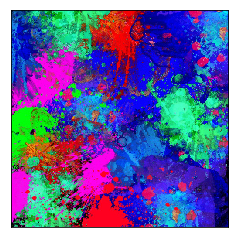

In [0]:
from PIL import Image

foto = Image.open('/content/drive/My Drive/Colab Notebooks/Imagen/mancha.jpg')

datos = list(foto.getdata())

datos_inver = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2])   for x in range(len(datos)) ]

img_inver = Image.new('RGB', foto.size)
img_inver.putdata(datos_inver)
plt.xticks([])
plt.yticks([])
plt.imshow(img_inver)


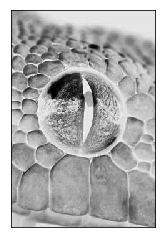

In [0]:




foto = Image.open('ojo.jpg')

datos = list(foto.getdata())

datos_inver = [255 - x   for x in datos ]

img_inver = Image.new('L', foto.size)
img_inver.putdata(datos_inver)
plt.xticks([])
plt.yticks([])
plt.imshow(np.asarray(img_inver), cmap='gray')

In [0]:
def negativo(l):
  img = cv2.imread('ojo.jpg', cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows,columns), dtype = np.uint8)
  for x in range(rows):
    for y in range(columns):
      img2[x,y]=(l-1) - img[x,y]
  mostrar2_gris(img ,img2, 'original','negativo')
  return 


for d in range(0 ,256):
 negativo(d)



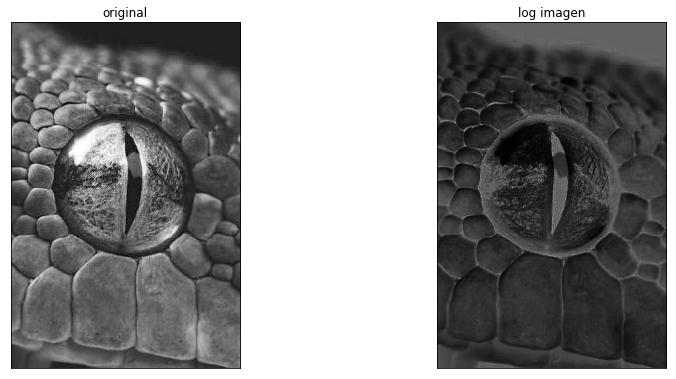

In [0]:
img_ccs = cv2.imread('ojo.jpg')
img_css_log = (np.log(img_ccs  - 1)/ (np.log(1 + np.max( img_ccs ))))*-255
img_css_log = np.array(img_css_log, dtype = np.uint8)
mostrar2_gris(img_ccs ,img_css_log,'original','log imagen')

apple20x22.jpg	hina.jfif   ico.jpg  mancha.jpg  pastel.png  tree.png
cubo		hinata.jpg  ima.jpg  ojo.jpg	 resid.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


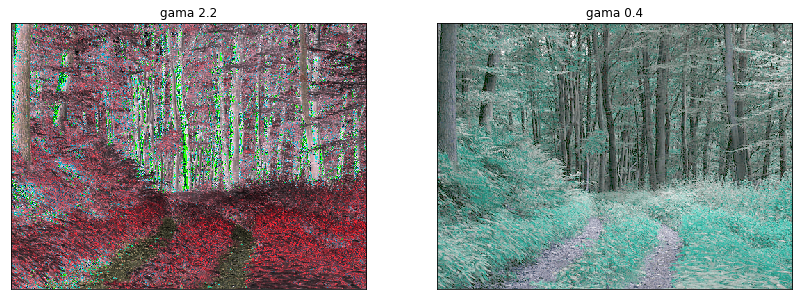

In [0]:

!ls
img_tree = cv2.imread('tree.png')
gama_two_point_two = np.array(255*(img_tree/255) **-0.2, dtype= 'uint8')
gamma_point_four= np.array(255*(img_tree/255) **0.4, dtype= 'uint8')
 
mostrar2_gris(gama_two_point_two,gamma_point_four, 'gama 2.2','gama 0.4')

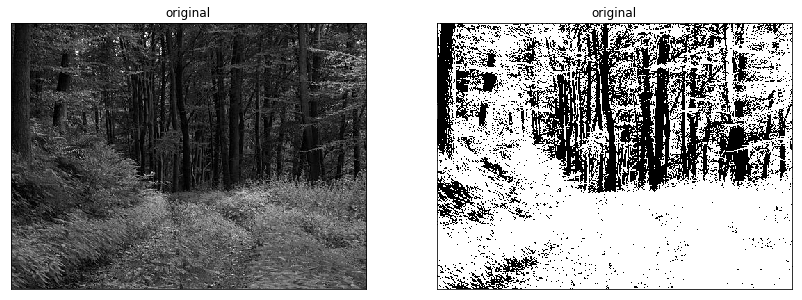

In [0]:
def binari(img , min=10,max=60):
  img= cv2.imread(img,0)
  row, column = img.shape
  imgl = np.zeros((row,column), dtype='uint8')
  
  min_range = min
  max_range = max
  
  for i in range(row):
    for j in range(column):
      if img[i,j] > min_range and img[i,j]> max_range:
         imgl[i,j]=255
      else:
        imgl[i,j]=0

  mostrar2_gris(img,imgl)

binari('tree.png',30,35)
        

apple20x22.jpg	hina.jfif   ico.jpg  mancha.jpg  pastel.png  tree.png
cubo		hinata.jpg  ima.jpg  ojo.jpg	 resid.png


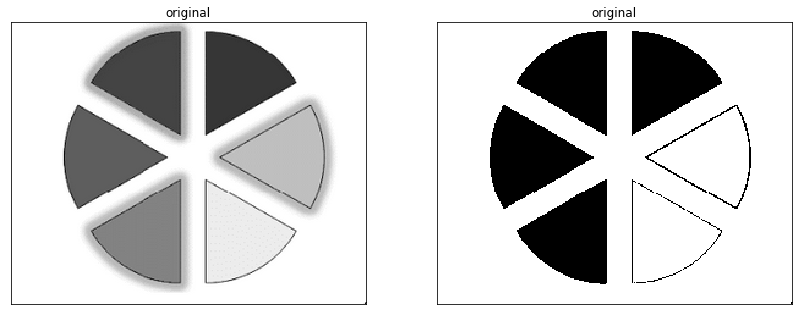

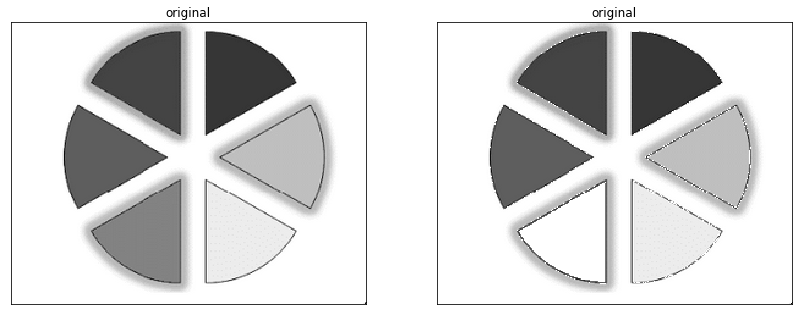

In [0]:
!ls
def binari2(img , min=10,max=60):
  img= cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  row, column = img.shape
  imgl = np.zeros((row,column), dtype='uint8')
  
  min_ = min
  max_ = max
  
  for x in range(0,row):
    for y in range(0,column):
      r =img[x][y]
      if min_ <=r and r <=max_:
        imgl[x][y] =255
      else:
        imgl[x][y] = img[x][y]
  mostrar2_gris(img,imgl)
  return
binari('pastel.png',125,150)
binari2('pastel.png',125,150)        
  
  

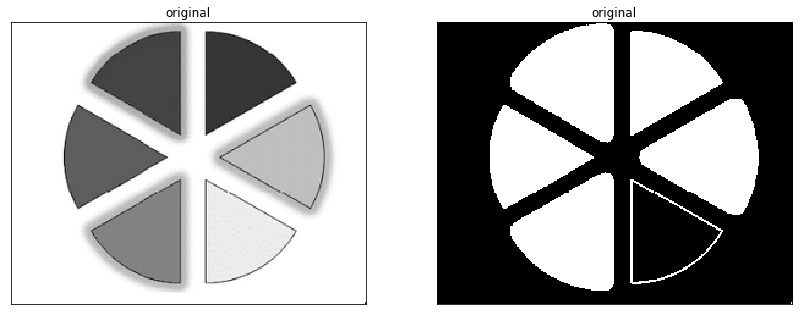

In [0]:
def threshold(img, thres):
  img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  row,column = img.shape
  img2 = np.zeros((row,column), dtype = np.uint8)
  
  T=thres
  
  for x in range(0,row):
    for y in range(0, column):
      r=img[x][y]
      if T<=r:
        img2[x][y] = 0
      else:
        img2[x][y] = 255
  mostrar2_gris(img,img2)
  return
threshold('pastel.png', 220)
 

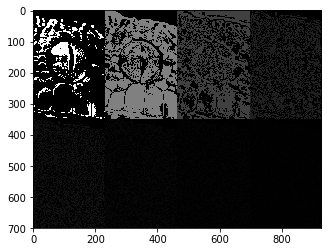

In [0]:
img = cv2.imread('ojo.jpg', 0)
lst=[]
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lst.append(np.binary_repr(img[i][j], width=8))
eight_bit_img = (np.array([int(i[0]) for i in lst  ] , dtype=np.uint8) *128).reshape(img.shape[0],img.shape[1] )
seven_bit_img =(np.array([int(i[1]) for i in lst  ] , dtype=np.uint8) *64).reshape(img.shape[0],img.shape[1] )
six_bit_img =(np.array([int(i[2]) for i in lst  ] , dtype=np.uint8) *32).reshape(img.shape[0],img.shape[1] )
five_bit_img = (np.array([int(i[3]) for i in lst  ] , dtype=np.uint8) *16).reshape(img.shape[0],img.shape[1] )
four_bit_img = (np.array([int(i[4]) for i in lst  ] , dtype=np.uint8) *8).reshape(img.shape[0],img.shape[1] )
three_bit_img = (np.array([int(i[5]) for i in lst  ] , dtype=np.uint8) *4).reshape(img.shape[0],img.shape[1] )
two_bit_img=(np.array([int(i[6]) for i in lst  ] , dtype=np.uint8) *2).reshape(img.shape[0],img.shape[1] )
one_bit_img = (np.array([int(i[7]) for i in lst  ] , dtype=np.uint8) *1).reshape(img.shape[0],img.shape[1] )

finalr = cv2.hconcat([ eight_bit_img,seven_bit_img,six_bit_img,five_bit_img ])
finalv = cv2.hconcat([ four_bit_img,three_bit_img,two_bit_img,one_bit_img ])

final = cv2.vconcat([finalr , finalv])
plt.imshow(final, cmap='gray')




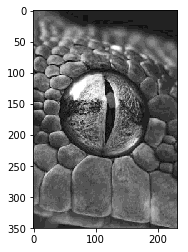

In [0]:
new_img_ojo =eight_bit_img  +   seven_bit_img +  six_bit_img + five_bit_img
plt.imshow(new_img_ojo, cmap='gray')

histogramaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


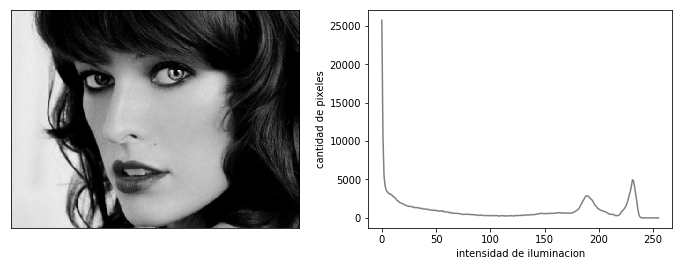

In [0]:
img = cv2.imread('resid.png', cv2.IMREAD_GRAYSCALE)
histograma = cv2.calcHist([img],[0],None,[256],[0,256])
plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(histograma , color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()


In [0]:
!ls
img = redRGB('lena.png')
color =('b','g','r')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.imshow(img)
plt.axis("off")

for i ,c in enumerate(color):
    histograma = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(1,2,2), plt.plot(histograma, color=c)
    plt.xlim([0,256])
plt.show()


apple20x22.jpg	hina.jfif   ico.jpg  lena.png	 ojo.jpg     resid.png
cubo		hinata.jpg  ima.jpg  mancha.jpg  pastel.png  tree.png
